Team austin:
Haoyuan Song
Sixuan Shen
Yuyao Wang
Mengfei Liang

In [1]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='shy950521', api_key='4KfRmGXb7Y1i8JrDmn5Y')
from plotly.graph_objs import *

In [2]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import widgets 
from IPython.display import display, clear_output, Image
from plotly.widgets import GraphWidget

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("201803_citibikenyc_tripdata.csv",
           na_values = {'starttime': "1/1/2010 00:00:00",
                       'stoptime': "1/1/2010 00:00:00"})

In [4]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender
0,455,2018-03-01 00:00:03,2018-03-01 00:07:39,405,Washington St & Gansevoort St,40.739323,-74.008119,368,Carmine St & 6 Ave,40.730386,-74.002150,17629,Annual Membership from Citi Bike App,Subscriber,1993.0,1
1,486,2018-03-01 00:00:06,2018-03-01 00:08:12,146,Hudson St & Reade St,40.716250,-74.009106,363,West Thames St,40.708347,-74.017134,31491,Annual Membership,Subscriber,1954.0,1
2,333,2018-03-01 00:00:07,2018-03-01 00:05:41,257,Lispenard St & Broadway,40.719392,-74.002472,361,Allen St & Hester St,40.716059,-73.991908,31991,FREE Bonus Month with Annual Membership,Subscriber,1986.0,1
3,1629,2018-03-01 00:00:21,2018-03-01 00:27:31,3556,24 St & 41 Ave,40.752709,-73.939740,3532,Ditmars Blvd & 19 St,40.781450,-73.918330,18265,Annual Membership,Subscriber,1990.0,1
4,64,2018-03-01 00:00:32,2018-03-01 00:01:37,515,W 43 St & 10 Ave,40.760094,-73.994618,3236,W 42 St & Dyer Ave,40.758985,-73.993800,27697,Annual Membership,Subscriber,1985.0,1


In [5]:
def date_trans(i):
    date = pd.datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    return date

In [6]:
df['starttime'] = df['starttime'].apply(date_trans)
df['stoptime'] = df['stoptime'].apply(date_trans)
# tranform the datatype into datetime.datetime

In [7]:
df['count'] = 0
station = df.groupby(['start station id'])['count'].sum()
station.count()

767

In [8]:
def count(year, month, start_day, end_day):
#count the number of bikes of each station.
    n =(end_day-start_day) * 2
    start = datetime.datetime(year=year, month=month,day=start_day,hour=0,minute=0,second=0)
    end = datetime.datetime(year=year, month=month,day=end_day,hour=0,minute=0,second=0)
    data = False
    for i in range(n):
        start = start + datetime.timedelta(hours = 12)
        end = end + datetime.timedelta(hours = 12)
        temp_start = df[(start < df['starttime']) & (df['starttime'] < end)]
        temp_stop = df[(start < df['stoptime']) & (df['stoptime'] < end)]
        start_count = station + temp_start.groupby(['start station id'])['starttime'].count()
        start_count.fillna(value=0, inplace=True)
        stop_count = station + temp_stop.groupby(['end station id'])['stoptime'].count()
        stop_count.fillna(value=0, inplace=True)
        temp_count = - start_count + stop_count
        temp_count.name = start
        if data is False:
            data = temp_count
        else:
            data = pd.concat([data, temp_count], join='outer', axis=1)
    temp_data = data
    temp_data['start station id']=  temp_data.index
    return temp_data

In [9]:
# Prepera datasets for later working
data_c = count(2018, 3, 1, 5)
data_a = data_c.reset_index(drop=True)
data2 = pd.read_csv("201803_citibikenyc_tripdata.csv", usecols=['start station id', 'start station latitude', 'start station longitude','start station name'])
station_lo = data2.drop_duplicates()
data_b = station_lo.merge(data_a, how='left', on='start station id')
station = station_lo
predict = data_c.drop(['start station id'], axis=1).transpose()
predict

start station id,72,79,82,83,119,120,127,128,143,144,...,3660,3661,3662,3663,3664,3668,3669,3671,3672,3674
2018-03-01 12:00:00,-4.0,10.0,10.0,30.0,-1.0,-1.0,-1.0,-1.0,-12.0,4.0,...,6.0,-3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-03-02 00:00:00,-2.0,-1.0,3.0,17.0,-3.0,-5.0,7.0,-2.0,-8.0,8.0,...,6.0,0.0,0.0,-12.0,2.0,1.0,0.0,0.0,0.0,0.0
2018-03-02 12:00:00,-4.0,15.0,5.0,32.0,0.0,-14.0,10.0,0.0,-5.0,6.0,...,20.0,1.0,0.0,-14.0,21.0,-1.0,0.0,0.0,0.0,0.0
2018-03-03 00:00:00,-1.0,9.0,3.0,34.0,7.0,-4.0,19.0,-7.0,-14.0,14.0,...,14.0,3.0,0.0,-11.0,2.0,3.0,0.0,0.0,0.0,0.0
2018-03-03 12:00:00,5.0,2.0,5.0,30.0,6.0,-8.0,24.0,-3.0,-24.0,17.0,...,13.0,6.0,0.0,-11.0,6.0,-1.0,0.0,0.0,0.0,0.0
2018-03-04 00:00:00,11.0,5.0,5.0,22.0,7.0,-5.0,20.0,3.0,-19.0,17.0,...,16.0,7.0,-1.0,-12.0,7.0,-2.0,1.0,0.0,0.0,0.0
2018-03-04 12:00:00,6.0,2.0,-1.0,27.0,7.0,-12.0,26.0,-1.0,-17.0,19.0,...,13.0,7.0,1.0,-11.0,11.0,-2.0,1.0,0.0,0.0,0.0
2018-03-05 00:00:00,-3.0,-8.0,-1.0,20.0,5.0,-11.0,33.0,-15.0,-15.0,17.0,...,-5.0,2.0,2.0,-3.0,-17.0,0.0,5.0,0.0,0.0,0.0


In [10]:
mapbox_access_token = 'pk.eyJ1IjoiY2FpdGxpbnNzcyIsImEiOiJjamdiZjZ5NXoxaTVtMzRwamM1YThsdzZsIn0.PkCNmrc0xc0fXQiG-vI1EQ'

trace2 = Scattermapbox(
    lat = data_b["start station latitude"],
    lon = data_b["start station longitude"],
    text = data_b["start station name"],
    mode='markers',
    marker=dict(
        size='10',
        color = data_b.iloc[:,4] ,
        colorscale='Viridis',
        showscale=True,
        opacity = 0.8
    )
)
data = [trace2]
layout = Layout(
    xaxis=dict(
        range=[40.67, 40.68]
    ),
    yaxis=dict(
        range=[-74.02, -73.95]
    )
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Traffic Network Flow in NY')

### Interactivity
We choose four days as an example from March 1st to March 4th to demo the interaction. We use the Integer Slider as the interaction tool. We count the flows every 12 hours so the minimum is 4 and the maximum is 12 which includes four days. When moving the slider bar, the result of our scatter map will also change.
### Map Visualization Tool
We use Mapbox maps in Plotly with a public Mapbox Access Token to call map for our dataset. To plot the scatter station on the map, we use Scattermapbox method. 
### Plot
The darker the points is, the number of flows of a station is larger.

In [22]:
month = widgets.IntSlider(
    value=1,
    min=1,
    max=15,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# out=widgets.Output(layout=Layout(height='900px', width = '1500px'))
container = widgets.HBox(children=[month] )
g = GraphWidget('https://plot.ly/~shy950521/2')

def response(change):
    
    g.restyle({'marker.color': [data_b.iloc[:,month.value+3]] })
#     print(month.value)

month.observe(response, names="value")

# from ipywidgets import IntSlider
# from ipywidgets.embed import embed_minimal_html

# # slider = IntSlider(value=40)
# embed_minimal_html('export.html', views=[g], title='Widgets export')
# with out:

display(container)
# container2 = widgets.HBox([origin, textbox])
# display(container2)
display(g)
# out


GraphWidget()

<h1>Redistribution Graph</h1>
### Motivation
With the first graph, we can easily see the bikes flow in New York city. In the real-world, it's useful to redistribute the bikes to rechieve a better balance. For example, bikes in low traffic area could be redistributed to areas with higher demand. This graph shows the redistribution way of bikes in New York city.
### Algorithm
The Minimum-cost flow problem is used to accomplish the bikes redistribution. The flow network can be regarded as a directed graph and the movement of bikes could be solved with linear programming. We used networkx package to implement the minimum-cost flow problem in Plotly.
### Visualization Tool
Here we use Plotly scatter plot to represent the flows between stations. We first used matplotlib and failed when 
we tried to draw all the details as well as the station dots on one plot: that is totally a mess. So we moved on
to plotly which shows a great interactivy performance. Now, only the dots would be shown on this plot at first. 
When the mouse hovers on a dot, the details of this dot such as the location and current flow situation would then 
be shown. 
### Center Station
Here we set a center station to serve our flow optimization plan. Center station plays an indispensable role during
time periods like morning rush hour, when every station is experiencing strong outflow or inflow. Center station serves supplying or takeing back unlimited number of bikes during peak time period.
### Station Dot
The larger dots in this plot are those stations whose number of bike inflows or outflows over 20. The color of each station dot associates with its current flow number, the specific color range could be read through right color bar.
Users can read details including current station location and current bike flow number.
### Flow Dot and Line
The smaller dots in this plot represent balanced flows between stations, which connect two stations with lines. 
The color of each station dot associates with its balanced flow number, the specific color range could be read through left color bar. Users can read details including start flow station, end flow station, bike flow number.

In [12]:
# Generate a directed network using networkx
G = nx.DiGraph()
G_flow = nx.DiGraph()
time = 1
id_list = []
sum = 0
pos_dic ={}
lab_dic = {}
size_list = []
color_list = []
center_x = 0
center_y = 0
col_len = predict.shape[1]
for i in range(col_len):
    temp_id = predict.iloc[:, i].name
    spam = int(predict.iloc[time, i])
    if (abs(spam)>20):
        print(temp_id)
        temp_station = station[(station['start station id'] == int(temp_id))]
        temp_lan = temp_station['start station latitude'].iloc[0]
        temp_long = temp_station['start station longitude'].iloc[0]
        temp_name = temp_station['start station name'].iloc[0]
    
        G.add_node(temp_id, x=temp_lan, y=temp_long, spam=spam, label=temp_name)
        G_flow.add_node(temp_id, x=temp_lan, y=temp_long, spam=spam, label=temp_name)
        id_list.append(temp_id)
        sum += spam
        pos_dic[temp_id] = [temp_lan, temp_long]
        lab_dic[temp_id] = temp_name
        size_list.append(abs(spam))
        if predict.iloc[time, i] >=0:
            color = 'r'
        else:
            color = 'b'
        color_list.append(color)
        color_list.append(color)
        center_x += temp_lan
        center_y += temp_long
    else:
        col_len -= 1
center_lan = center_x/col_len
center_long = center_y/col_len
print(center_lan)
G.add_node(10000, x=center_lan, y=center_long, spam=0 - sum)
G_flow.add_node(10000, x=center_lan, y=center_long, spam=0 - sum, label="center")
id_list.append(10000)
pos_dic[10000] = [center_lan, center_long]
lab_dic[10000] = 'center'
size_list.append(0 - sum)
color_list.append('g')
for i in range(len(id_list)):
    last = id_list.pop()
    if len(id_list) == 0:
        break
    for j in range(len(id_list)):
        a = np.sqrt(np.square(G.node[last]['x'] - G.node[id_list[j]]['x']) + np.square(G.node[last]['y'] - G.node[id_list[j]]['y']))
        b = int(a * 1000)
        G.add_edge(last, id_list[j], cost=b)
        G.add_edge(id_list[j], last, cost=b)

168
217
236
239
243
258
281
284
301
308
324
327
336
339
356
377
382
391
396
399
412
414
416
420
422
432
433
436
438
445
462
481
482
487
490
497
528
539
2000
3096
3152
3160
3161
3164
3165
3177
3232
3236
3283
3285
3295
3349
3354
3427
3461
3536
3538
3539
3583
3641
40.7305885185


  start      start_lan      start_long                          star_name  \
0   239    40.69196566     -73.9813018           Willoughby St & Fleet St   
1   239    40.69196566     -73.9813018           Willoughby St & Fleet St   
0   258    40.68940747    -73.96885458        DeKalb Ave & Vanderbilt Ave   
0   258    40.68940747    -73.96885458        DeKalb Ave & Vanderbilt Ave   
0   281     40.7643971    -73.97371465  Grand Army Plaza & Central Park S   
0   284  40.7390169121  -74.0026376103              Greenwich Ave & 8 Ave   
0   301    40.72217444    -73.98368779                  E 2 St & Avenue B   
0   308    40.71307916    -73.99851193            St James Pl & Oliver St   
0   339    40.72580614    -73.97422494                 Avenue D & E 12 St   
0   356    40.71622644    -73.98261206       Bialystoker Pl & Delancey St   
0   356    40.71622644    -73.98261206       Bialystoker Pl & Delancey St   
0   356    40.71622644    -73.98261206       Bialystoker Pl & Delancey St   

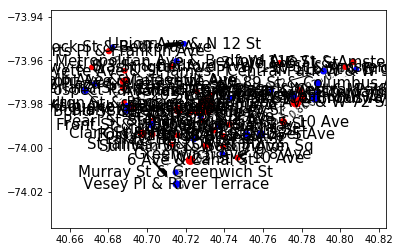

In [13]:
# apply Minimum-cost flow algorithm to the network
flowCost, flowDict = nx.network_simplex(G, demand='spam',weight='cost')
all_df = False
flow_label = {}
for i in flowDict:
    for j in flowDict[i]:
        if flowDict[i][j] == 0:
            continue
        try:
            start_station = station[(station['start station id'] == int(i))]
            start_lan = start_station['start station latitude'].iloc[0]
            start_long = start_station['start station longitude'].iloc[0]
            start_name = start_station['start station name'].iloc[0]
        except:
            start_lan = center_lan
            start_long = center_long
            start_name = 'center'
        try:
            stop_station = station[(station['start station id'] == int(j))]
            stop_lan = stop_station['start station latitude'].iloc[0]
            stop_long = stop_station['start station longitude'].iloc[0]
            stop_name = stop_station['start station name'].iloc[0]
        except:
            stop_lan = center_lan
            stop_long = center_long
            stop_name = 'center'

        data = np.array([i,start_lan,start_long,start_name,j,stop_lan,stop_long,stop_name,flowDict[i][j]])
        s = pd.Series(data, index=['start', 'start_lan','start_long','star_name','end','end_lan','end_long','end_name','weight'])
        G_flow.add_edge(i, j,weight=flowDict[i][j])
        flow_label[i,j] = flowDict[i][j]/100
        if all_df is False:
            all_df = s
        else:
            all_df = pd.concat([all_df, s], join='outer', axis=1)
min_flow = all_df.transpose()
print(min_flow)
# draw a basic map with matplotlib
nx.draw_networkx_labels(G_flow, pos = pos_dic, labels=lab_dic, font_size=15)
nx.draw_networkx_nodes(G_flow, pos=pos_dic, node_size= size_list,node_color=color_list)
nx.draw_networkx_edges(G_flow, pos=pos_dic, width=1)
nx.draw_networkx_edge_labels(G_flow, pos=pos_dic, edge_labels=flow_label)
plt.show()

In [14]:

edge_trace = Scatter(
    x=[],
    y=[],
    text=[],
    line=Line(width=0.5,color='#888',shape = "spline"),
    hoverinfo='none',
    mode='lines')

edge_info = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='Hot',
        reversescale=True,
        color=[],
        size=7,
        colorbar=dict(
            thickness=15,
            title='flow',
            xanchor='left',
            titleside='right',
            x=0
        ),
        line=dict(width=1))
)

for edge in G_flow.edges():
    x0= G_flow.node[edge[0]]['x']
    y0= G_flow.node[edge[0]]['y']
    x1= G_flow.node[edge[1]]['x']
    y1= G_flow.node[edge[1]]['y']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]
    edge_info['marker']['color'].append(G_flow[edge[0]][edge[1]]['weight'])
    edge_info['x'].append((float(x0)+float(x1))/2)
    edge_info['y'].append((float(y0)+float(y1))/2)
    edge_text = "From "+ str(G_flow.node[edge[0]]['label']) + " to "+str(G_flow.node[edge[1]]['label'])+" ---- "+str(G_flow[edge[0]][edge[1]]['weight'])
    edge_info['text'].append(edge_text)

node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=14,
        colorbar=dict(
            thickness=15,
            title='stock',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=1)))

for node in G_flow.nodes():
    x = G.node[node]['x']
    y = G.node[node]['y']
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    node_trace['marker']['color'].append(G_flow.node[node]['spam'])
    node_info = G_flow.node[node]['label']+': '+str(G_flow.node[node]['spam'])
    node_trace['text'].append(node_info)

    
fig = Figure(data=Data([edge_trace, node_trace, edge_info]),
             layout=Layout(
                title='<br>Redistribution plan',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

In [15]:
from ipywidgets import IntSlider
from ipywidgets.embed import embed_minimal_html

slider = IntSlider(value=40)
embed_minimal_html('export.html', views=[slider], title='Widgets export')